# Example: Fit Canonical Phase-Type NHPP Models

This notebook loads the bundled MUSA ss1a dataset and fits an exponential NHPP model.

In [1]:
# initialize
import importlib.resources as resources

import pandas as pd
import pysrat as srat

In [31]:
data_path = resources.files("pysrat").joinpath("datasets/musa/sys1.csv")
df = pd.read_csv(data_path)
df

,time,fault,indicator
0,3,0,1
1,30,0,1
2,113,0,1
3,81,0,1
4,115,0,1
...,...,...,...
132,5485,0,1
133,1160,0,1
134,1864,0,1
135,4116,0,1


In [35]:
data_path = resources.files("pysrat").joinpath("datasets/musa/sys1.csv")
df = pd.read_csv(data_path)

data = srat.NHPPData.from_intervals(
    time=df["time"].to_numpy(dtype=float),
    fault=df["fault"].to_numpy(dtype=float),
    type=df["indicator"].to_numpy(dtype=int)
)

In [34]:
data_path = resources.files("pysrat").joinpath("datasets/musa/sys1g.csv")
df = pd.read_csv(data_path)

data = srat.NHPPData.from_counts(fault=df["fault"].to_numpy(dtype=float))

In [36]:
models = {
    "phase5": srat.CanonicalPhaseTypeNHPP(5),
    "phase10": srat.CanonicalPhaseTypeNHPP(10),
    "phase20": srat.CanonicalPhaseTypeNHPP(20),
    "phase50": srat.CanonicalPhaseTypeNHPP(50),
    "phase100": srat.CanonicalPhaseTypeNHPP(100),
    "phase200": srat.CanonicalPhaseTypeNHPP(200)
}

for model in models.values():
    model.fit(data, verbose=True)

<Axes: xlabel='time', ylabel='# of faults'>

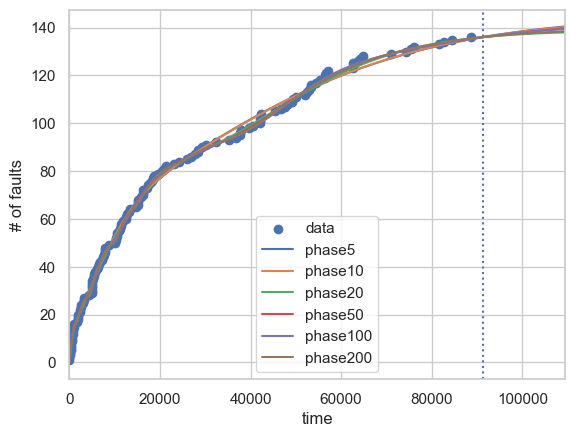

In [37]:
srat.plot_mvf(data, models)

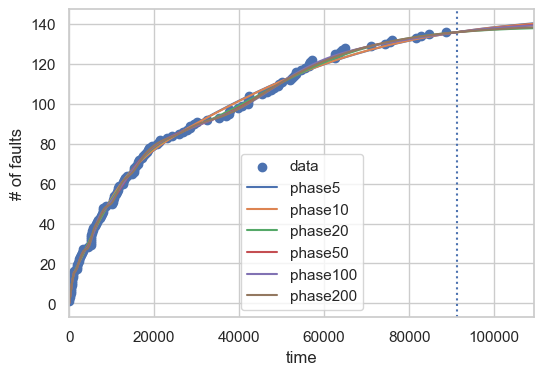

In [38]:
# seaborn example
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
srat.plot_mvf(data, models, ax=ax)
plt.show()


<Axes: xlabel='time', ylabel='# of faults'>

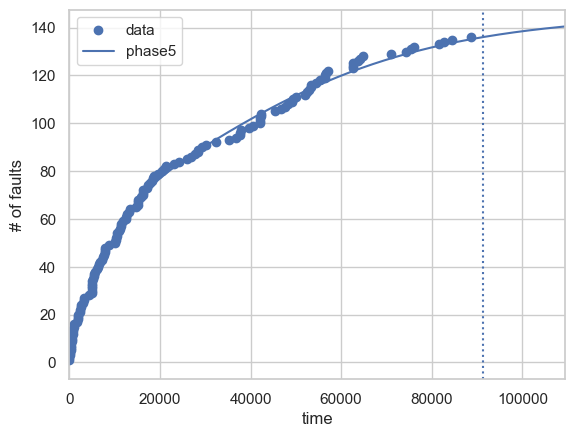

In [39]:
best_key = min(models, key=lambda k: models[k].aic_)
srat.plot_mvf(data, {best_key: models[best_key]})